In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


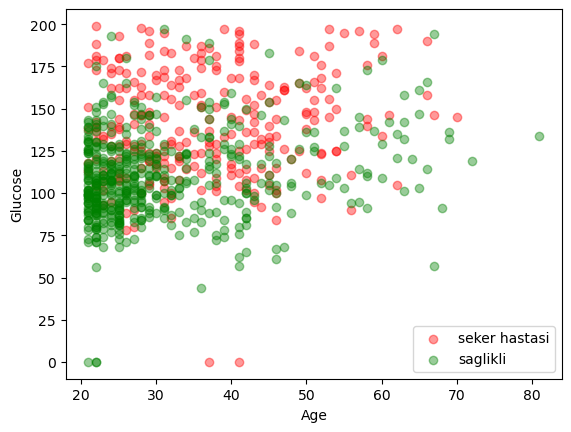

In [3]:
seker_hastalari = data[data.Outcome == 1]
sagliklilar = data[data.Outcome == 0]

plt.scatter(seker_hastalari.Age,seker_hastalari.Glucose ,color = "red" , label = 'seker hastasi',alpha = 0.4)
plt.scatter(sagliklilar.Age,sagliklilar.Glucose ,color = "green" , label = 'saglikli',alpha = 0.4)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

In [4]:
# verilerin normalize edelim 
# sebebi bir deger mesela glucose degerleri 0-200 arasindayken baska bir deger mesela yas 0-80 arasi oldugundan 
# glucose degerleri daha buyuk oldugu icin daha onemli gozukur ve datanin dogru islenememesine sebep
# olur bu yuzden onlari normalize edip 0-1 araligina getirmeliyiz)

# outcome sutunun degerlerini bir diziye atiyoruz
y = data.Outcome.values

# outcome sutununu cikarip sadece bagimsiz degerleri birakiyoruz
x_ham_veri = data.drop(["Outcome"], axis = 1 )

# ilk once ham veri min verilere bolerek 0 dan baslayacak sekilde verileri hizaliyoruz
# sonra max ile min farkina bolerek tum veriyi 0 ile 1 arasina getiriyoruz

x = (x_ham_veri - np.min(x_ham_veri)) / (np.max(x_ham_veri)-np.min(x_ham_veri))

In [5]:

x_ham_veri.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.007092,0.174941,0.085106,0.041371,0.000000,0.039716,0.000741,0.059102
1,0.001182,0.100473,0.078014,0.034279,0.000000,0.031442,0.000415,0.036643
2,0.009456,0.216312,0.075650,0.000000,0.000000,0.027541,0.000794,0.037825
3,0.001182,0.105201,0.078014,0.027187,0.111111,0.033215,0.000197,0.024823
4,0.000000,0.161939,0.047281,0.041371,0.198582,0.050946,0.002704,0.039007


In [26]:
# train data ile test datayi ayirmaliyiz simdide
x_train , x_test , y_train, y_test = train_test_split(x,y , test_size = 0.1, random_state = 1)


# modeli olusturalim 
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbor = k
# usteki en yakin kac komsuna gore degerlendirildigin sayisi
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("K = 3 icin dogruluk orani %" ,knn.score(x_test,y_test)*100)

K = 3 icin dogruluk orani % 77.92207792207793


In [27]:
# en iyi k degerini bulalim
sayac = 1
for k in range(1,12):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print(f"K = {k} icin dogruluk orani %" ,(knn_yeni.score(x_test,y_test)*100))

K = 1 icin dogruluk orani % 79.22077922077922
K = 2 icin dogruluk orani % 74.02597402597402
K = 3 icin dogruluk orani % 77.92207792207793
K = 4 icin dogruluk orani % 74.02597402597402
K = 5 icin dogruluk orani % 72.72727272727273
K = 6 icin dogruluk orani % 75.32467532467533
K = 7 icin dogruluk orani % 74.02597402597402
K = 8 icin dogruluk orani % 76.62337662337663
K = 9 icin dogruluk orani % 76.62337662337663
K = 10 icin dogruluk orani % 76.62337662337663
K = 11 icin dogruluk orani % 77.92207792207793
